In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Movie_regression.csv", header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


### Missing Value Imputation

In [5]:
df.corr()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
Marketing expense,1.000000,0.406583,-0.420972,-0.219247,0.352734,0.380050,0.379813,0.380069,0.376462,-0.184985,-0.443457,0.026019,0.013518,0.059204,0.383298,-0.389582
Production expense,0.406583,1.000000,-0.763651,-0.391676,0.644779,0.706481,0.707956,0.707566,0.705819,-0.251565,-0.591657,0.015888,-0.000839,0.055810,0.707559,-0.484754
Multiplex coverage,-0.420972,-0.763651,1.000000,0.302188,-0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.145555,0.581386,0.035922,0.004882,-0.092104,-0.915495,0.429300
Budget,-0.219247,-0.391676,0.302188,1.000000,-0.240265,-0.208464,-0.203981,-0.201907,-0.205397,0.232361,0.602536,0.040773,0.030674,-0.064694,-0.282796,0.696304
Movie_length,0.352734,0.644779,-0.731470,-0.240265,1.000000,0.746904,0.746493,0.747021,0.746707,-0.217830,-0.589318,-0.019984,0.009380,0.075198,0.673896,-0.377999
Lead_ Actor_Rating,0.380050,0.706481,-0.768589,-0.208464,0.746904,1.000000,0.997905,0.997735,0.994073,-0.169978,-0.490267,0.038494,0.014463,0.036794,0.706331,-0.251355
Lead_Actress_rating,0.379813,0.707956,-0.769724,-0.203981,0.746493,0.997905,1.000000,0.998097,0.994003,-0.165992,-0.487536,0.038432,0.010239,0.038005,0.708257,-0.249459
Director_rating,0.380069,0.707566,-0.769157,-0.201907,0.747021,0.997735,0.998097,1.000000,0.994126,-0.166638,-0.486452,0.036300,0.010077,0.041470,0.709364,-0.246650
Producer_rating,0.376462,0.705819,-0.764873,-0.205397,0.746707,0.994073,0.994003,0.994126,1.000000,-0.167003,-0.487911,0.028988,0.005850,0.032542,0.703518,-0.248200
Critic_rating,-0.184985,-0.251565,0.145555,0.232361,-0.217830,-0.169978,-0.165992,-0.166638,-0.167003,1.000000,0.228641,-0.015033,-0.023655,-0.049797,-0.128769,0.341288


In [6]:
df['Time_taken'].mean()

157.39149797570855

In [7]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


In [7]:
df.corr()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
Marketing expense,1.000000,0.406583,-0.420972,-0.219247,0.352734,0.380050,0.379813,0.380069,0.376462,-0.184985,-0.443457,0.026019,0.013518,0.059204,0.383298,-0.389582
Production expense,0.406583,1.000000,-0.763651,-0.391676,0.644779,0.706481,0.707956,0.707566,0.705819,-0.251565,-0.591657,0.015888,-0.000839,0.055810,0.707559,-0.484754
Multiplex coverage,-0.420972,-0.763651,1.000000,0.302188,-0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.145555,0.581386,0.035922,0.004882,-0.092104,-0.915495,0.429300
Budget,-0.219247,-0.391676,0.302188,1.000000,-0.240265,-0.208464,-0.203981,-0.201907,-0.205397,0.232361,0.602536,0.040773,0.030674,-0.064694,-0.282796,0.696304
Movie_length,0.352734,0.644779,-0.731470,-0.240265,1.000000,0.746904,0.746493,0.747021,0.746707,-0.217830,-0.589318,-0.019984,0.009380,0.075198,0.673896,-0.377999
Lead_ Actor_Rating,0.380050,0.706481,-0.768589,-0.208464,0.746904,1.000000,0.997905,0.997735,0.994073,-0.169978,-0.490267,0.038494,0.014463,0.036794,0.706331,-0.251355
Lead_Actress_rating,0.379813,0.707956,-0.769724,-0.203981,0.746493,0.997905,1.000000,0.998097,0.994003,-0.165992,-0.487536,0.038432,0.010239,0.038005,0.708257,-0.249459
Director_rating,0.380069,0.707566,-0.769157,-0.201907,0.747021,0.997735,0.998097,1.000000,0.994126,-0.166638,-0.486452,0.036300,0.010077,0.041470,0.709364,-0.246650
Producer_rating,0.376462,0.705819,-0.764873,-0.205397,0.746707,0.994073,0.994003,0.994126,1.000000,-0.167003,-0.487911,0.028988,0.005850,0.032542,0.703518,-0.248200
Critic_rating,-0.184985,-0.251565,0.145555,0.232361,-0.217830,-0.169978,-0.165992,-0.166638,-0.167003,1.000000,0.228641,-0.015033,-0.023655,-0.049797,-0.128769,0.341288


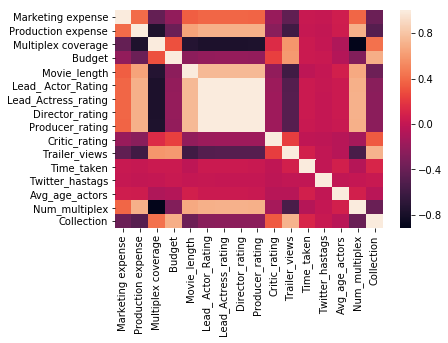

In [8]:
sns.heatmap(df.corr())

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


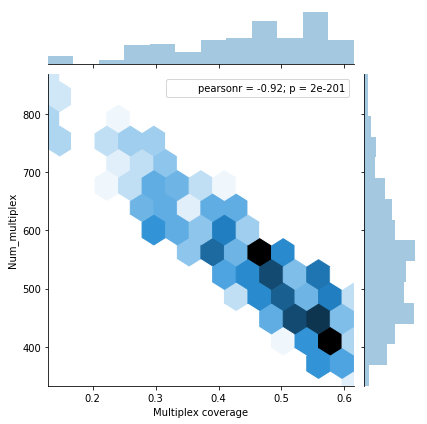

In [9]:
sns.jointplot(x='Multiplex coverage',y='Num_multiplex',data=df,kind='hex')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


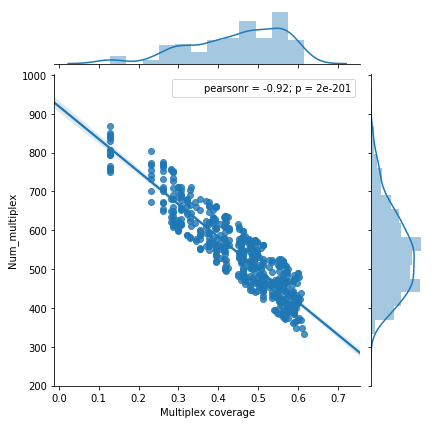

In [10]:
sns.jointplot(x='Multiplex coverage',y='Num_multiplex',data=df,kind='reg')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


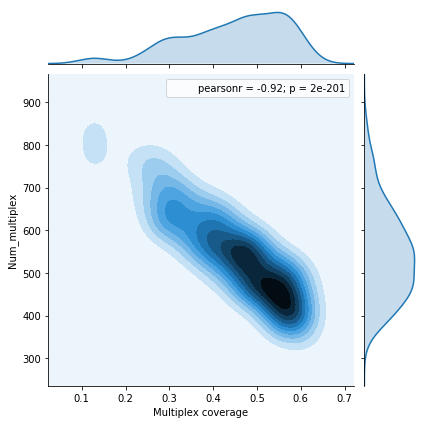

In [11]:
sns.jointplot(x='Multiplex coverage',y='Num_multiplex',data=df,kind='kde')

### Dummy Variable Creation

In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [10]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


### X-y split

In [12]:
X = df.loc[:,df.columns!="Collection"]
type(X)

pandas.core.frame.DataFrame

In [13]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [14]:
X.shape

(506, 19)

In [15]:
y = df["Collection"]
type(y)

pandas.core.series.Series

In [16]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [17]:
y.shape

(506,)

### Test-Train Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [20]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


In [21]:
X_train.shape

(404, 19)

In [22]:
X_test.shape

(102, 19)

### Standardizing Data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler().fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [25]:
X_train_std = sc.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [26]:
X_test_std = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
X_test_std

array([[-0.40835869, -1.12872913,  0.83336883, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [ 0.71925111,  0.9988844 , -0.65283979, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [-0.40257488,  0.39610829,  0.05115377, ...,  1.50268577,
        -0.48525664, -0.75225758],
       ...,
       [-0.3982601 , -0.85812418,  0.89420778, ..., -0.66547513,
        -0.48525664,  1.3293319 ],
       [-0.39934279, -0.07637654,  0.58132175, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [-0.40088071, -0.36702631,  0.31189212, ..., -0.66547513,
        -0.48525664, -0.75225758]])

In [28]:
X_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.320,7.460,7.275,7.515,8.62,483051,111.040000,283.616,53,452,0,1,0,0
371,204.6460,91.20,0.369,34529.880,173.5,9.310,9.525,9.320,9.505,7.96,454281,196.000000,268.000,25,609,1,1,0,0
219,22.2850,82.78,0.450,35402.015,165.9,8.175,8.375,8.315,8.405,8.72,451935,123.200000,263.680,21,561,1,1,0,0
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,157.391498,301.328,40,677,1,0,0,1
78,21.1292,80.66,0.563,34618.760,127.2,7.330,7.500,7.450,7.690,8.26,447528,176.480000,303.392,53,377,1,0,1,0
15,32.5478,71.28,0.462,32407.870,130.0,7.700,7.825,7.640,7.840,6.80,497626,169.960000,283.184,28,598,1,0,0,1
487,116.7134,91.20,0.417,32802.275,126.7,8.320,8.575,8.420,8.385,6.96,451515,168.240000,223.296,44,621,0,1,0,0
340,21.2302,65.38,0.485,33152.240,132.0,7.470,7.620,7.515,7.770,7.96,459687,129.480000,262.992,20,534,1,1,0,0
310,72.7096,74.80,0.456,27625.015,111.3,8.685,8.860,8.685,8.735,7.32,447032,146.440000,222.576,27,562,0,0,0,1
102,24.5752,72.12,0.480,35579.775,158.9,8.485,8.725,8.635,8.725,7.82,457364,135.440000,262.976,57,544,0,0,0,0


### Training Regression Tree
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [37]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C = 3000)

In [38]:
svr.fit(X_train_std, y_train)

SVR(C=3000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Predict values using trained model

In [39]:
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [40]:
y_test_pred

array([54149.04985486, 42108.34471214, 47533.48916051, 17335.56708281,
       48583.82292107, 39306.44775797, 33505.9535726 , 43171.76493611,
       29476.26499757, 46980.75731107, 12645.08472006, 38648.42247605,
       38048.23936642,  8415.03656142, 67457.69091145, 62224.20392732,
       38975.54675176, 65880.00221637, 56742.36900527, 42713.82149416,
       53525.49453611, 39264.6242224 , 41193.07225572, 58209.33323513,
       42495.88201229, 12132.62441561, 40418.388771  , 29850.91523034,
       75048.6007429 , 43839.06117389, 36786.86517154, 37330.36790834,
       37565.19845685, 40538.47149966, 51853.9891749 , 35081.953653  ,
       25483.31757363, 36025.27585637, 36413.96001026, 36164.40005112,
       47058.89224017, 45705.55298319, 44210.84051282, 27455.32262481,
       50732.91083479, 46541.4643388 , 32853.69351744, 40270.99818314,
       15510.53146758, 52029.40170025, 41465.42768853, 38769.99820302,
       47214.74691352, 68388.92527648, 25170.79907635, 41175.69832861,
      

### Model Performance

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mean_squared_error(y_test, y_test_pred)

161383675.95784867

In [43]:
r2_score(y_train, y_train_pred)

0.7110100333340962

In [44]:
r2_score(y_test, y_test_pred)

0.49869112364165125